In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/reviewContent+metadata.csv

[Errno 20] Not a directory: '/content/reviewContent+metadata.csv'
/content


In [4]:
import numpy as np
import pandas as pd
import itertools


In [5]:
dataset=pd.read_csv("/content/reviewContent+metadata.csv", encoding="ISO-8859-1",on_bad_lines='skip')
dataset=dataset.astype(str)

<ipython-input-5-59741d8397b8>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("/content/reviewContent+metadata.csv", encoding="ISO-8859-1",on_bad_lines='skip')


In [6]:
dataset.shape
dataset.head(10)

,user_id,prod_id,rating,label,date,text_
0,5044.0,0.0,1.0,-1.0,11/16/2014,"Drinks were bad, the hot chocolate was watered..."
1,5045.0,0.0,1.0,-1.0,9/8/2014,This was the worst experience I've ever had a ...
2,5046.0,0.0,3.0,-1.0,10/6/2013,This is located on the site of the old Spruce ...
3,5047.0,0.0,5.0,-1.0,11/30/2014,I enjoyed coffee and breakfast twice at Toast ...
4,5048.0,0.0,5.0,-1.0,8/28/2014,I love Toast! The food choices are fantastic -...
5,5049.0,0.0,5.0,-1.0,7/16/2013,The egg on an English muffin (their take on eg...
6,5050.0,0.0,5.0,-1.0,3/3/2013,wonderful relaxed vibe and fantastic homemade ...
7,5051.0,0.0,1.0,1.0,12/5/2014,Extremely slow kitchen. I went with an hour to...
8,5052.0,0.0,2.0,1.0,11/26/2014,I really wanted to love toast. It's quaint and...
9,5053.0,0.0,4.0,1.0,11/17/2014,First brunch experience here in Philly (actual...


In [7]:
labels=dataset.label
labels.head(10)

0    -1.0
1    -1.0
2    -1.0
3    -1.0
4    -1.0
5    -1.0
6    -1.0
7     1.0
8     1.0
9     1.0
Name: label, dtype: object

In [8]:
dataset.replace(to_replace="-1.0",value="FAKE",inplace=True)
dataset.replace(to_replace="1.0",value="REAL",inplace=True)

In [9]:
labels=dataset.label
labels.head(10)

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset['text_'],labels,test_size=0.2,random_state=10)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 90.81%


In [13]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[  2321,  13659],
       [  5621, 100166]])

528132 POSITIVE REVIEW
80466 NEGATIVE REVIEW


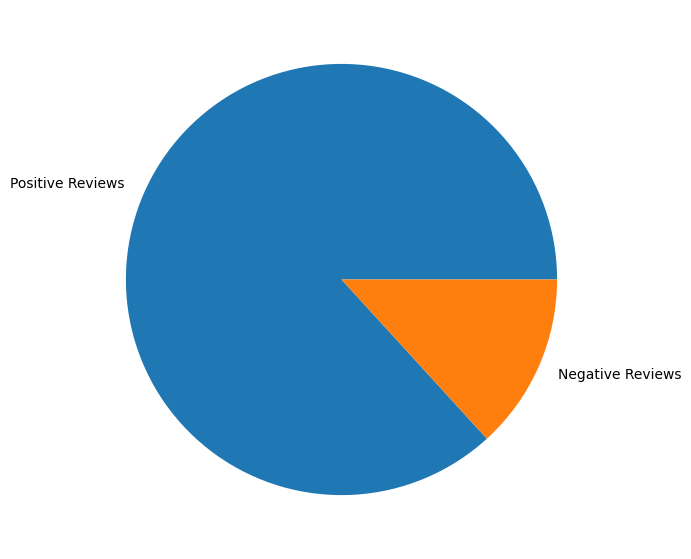

In [14]:
from matplotlib import pyplot as plt
pos=0
neg=0
for score in dataset['label']:
  if score == "REAL":
    pos+=1
  elif score == "FAKE":
    neg+=1

values=[int(pos),int(neg)]
label = ['Positive Reviews','Negative Reviews']

fig = plt.figure(figsize=(10,7))
plt.pie(values,labels=label)
print(pos,"POSITIVE REVIEW")
print(neg,"NEGATIVE REVIEW")

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.29      0.15      0.19     15980
        REAL       0.88      0.95      0.91    105787
         nan       1.00      1.00      1.00     87948

    accuracy                           0.91    209715
   macro avg       0.72      0.70      0.70    209715
weighted avg       0.89      0.91      0.89    209715



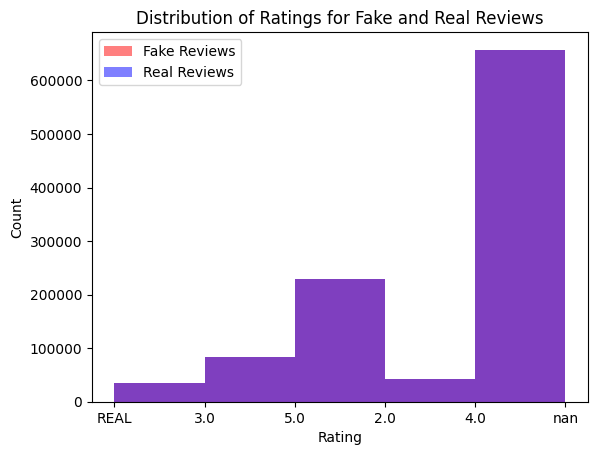

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

plt.hist(dataset['rating'], bins=5, alpha=0.5, label='Fake Reviews', color='red')
plt.hist(dataset['rating'], bins=5, alpha=0.5, label='Real Reviews', color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(loc='best')
plt.title('Distribution of Ratings for Fake and Real Reviews')
plt.show()

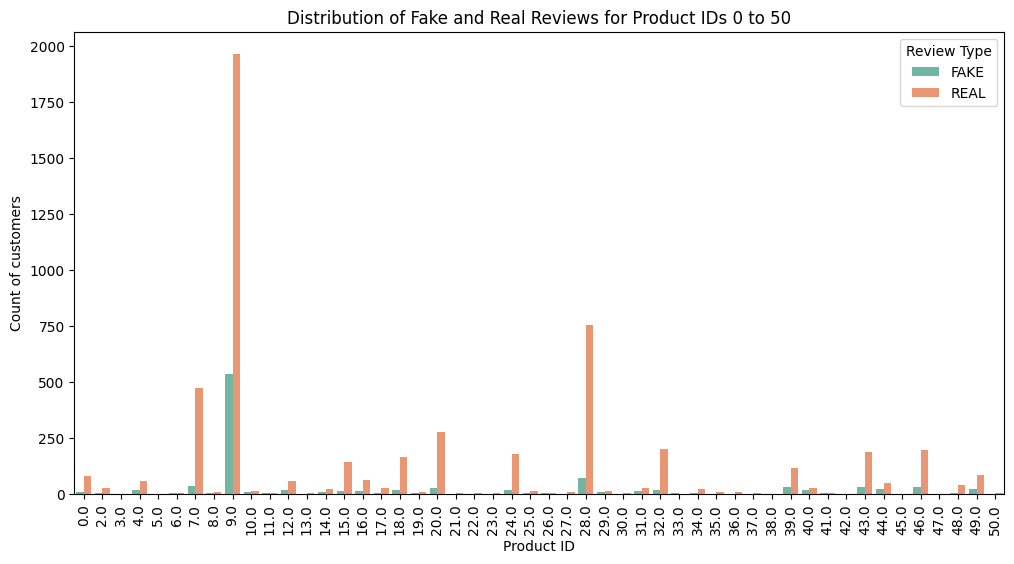

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

start_prod_id = 0  # Change this to your desired starting product ID
end_prod_id = 50   # Change this to your desired ending product ID


dataset['prod_id'] = pd.to_numeric(dataset['prod_id'], errors='coerce')

# Filter the dataset for the specified product ID range
subset_data = dataset[(dataset['prod_id'] >= start_prod_id) & (dataset['prod_id'] <= end_prod_id)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=subset_data, x='prod_id', hue='label', palette='Set2')
plt.xlabel('Product ID')
plt.ylabel('Count of customers')
plt.legend(title='Review Type', loc='upper right')
plt.title(f'Distribution of Fake and Real Reviews for Product IDs {start_prod_id} to {end_prod_id}')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()




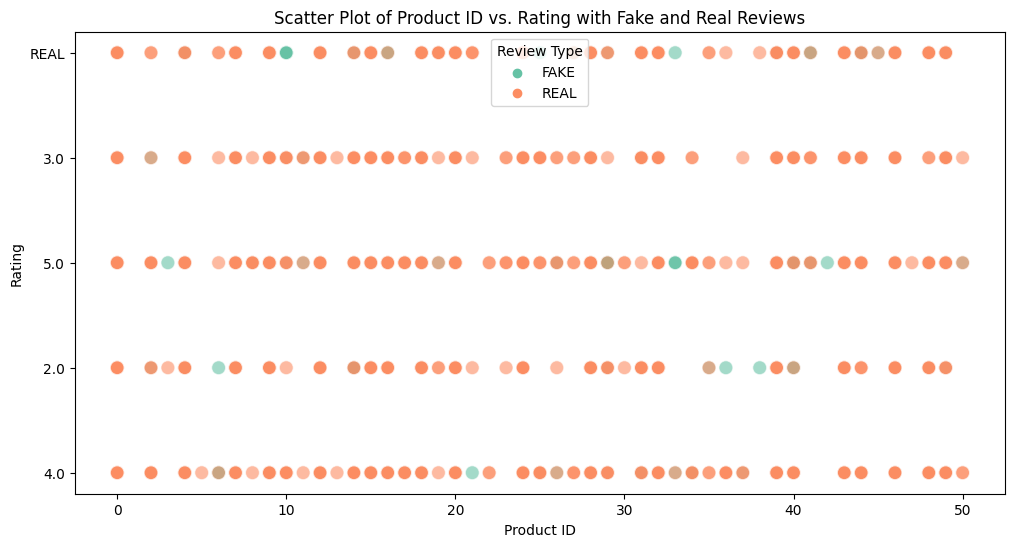

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

start_prod_id = 0  # Change this to your desired starting product ID
end_prod_id = 50   # Change this to your desired ending product ID

# Filter the dataset for the specified product ID range
subset_data = dataset[(dataset['prod_id'] >= start_prod_id) & (dataset['prod_id'] <= end_prod_id)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=subset_data, x='prod_id', y='rating', hue='label', palette='Set2', alpha=0.6, s=100)
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.legend(title='Review Type')
plt.title('Scatter Plot of Product ID vs. Rating with Fake and Real Reviews')

plt.show()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fake_reviews = dataset[dataset['label'] == -1]
real_reviews = dataset[dataset['label'] == 1]

dataset['prod_id'] = pd.to_numeric(dataset['prod_id'], errors='coerce')
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce')

# Group data by 'prod_id' and calculate the average rating for fake and real reviews
avg_ratings = dataset.groupby(['prod_id', 'label'])['rating'].mean().reset_index()

# Create a pivot table for the heatmap
heatmap_data = avg_ratings.pivot(index='prod_id', columns='label', values='rating')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Review Type')
plt.ylabel('Product ID')
plt.title('Average Ratings by Product ID for Fake and Real Reviews')
plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='prod_id', hue='label', palette='Set2')
plt.xlabel('prod_id')
plt.ylabel('Count')
plt.legend(title='Review Type', loc='upper right')
plt.title('Distribution of Fake and Real Reviews by Product ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()